In [1]:
# Check version inside your Python program
from platform import python_version
print(python_version())

3.6.9


In [2]:
import cv2
import numpy as np
import skimage
from matplotlib import pyplot as plt

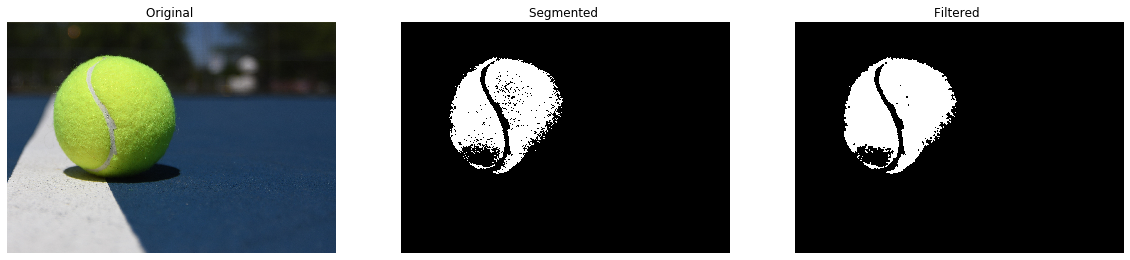

In [3]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

image = cv2.imread('imgs/tennis.jpg') 

# Pasamos la imagen a espacio HSV
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Segmentacion
min_val = (35,100,100)
max_val = (40,255,255) 
segmented = cv2.inRange(image, min_val, max_val)

# Filtrado
filtered = cv2.medianBlur(segmented,3)
kernel = disk(7)
filtered = closing(filtered, kernel)
kernel = disk(3)
filtered = opening(filtered, kernel)

image = cv2.imread('imgs/tennis.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.imshow(image)           
plt.title('Original ')
plt.axis('off')  

plt.subplot(1, 3, 2)
plt.imshow(segmented, cmap='gray')           
plt.title('Segmented ')
plt.axis('off') 

plt.subplot(1, 3, 3)
plt.imshow(filtered, cmap='gray')           
plt.title('Filtered ')
plt.axis('off') 

plt.show() 

In [7]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

image = cv2.imread('imgs/tennis.jpg') 

# Pasamos la imagen a espacio HSV
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Segmentacion
min_val = (35,100,100)
max_val = (40,255,255) 
segmented = cv2.inRange(image, min_val, max_val)

# Filtrado
filtered = cv2.medianBlur(segmented,3)
kernel = disk(7)
filtered = closing(filtered, kernel)
kernel = disk(3)
filtered = opening(filtered, kernel)

# Calculo de momentos centralizados
moments = cv2.moments(filtered)

# Calculo de momentos de Hu
huMoments = cv2.HuMoments(moments)
print("Hu moments: \n", huMoments)

Hu moments: 
 [[ 7.16758075e-04]
 [ 1.26726723e-08]
 [ 1.12764463e-12]
 [ 9.95432328e-13]
 [ 8.15371952e-25]
 [ 3.87430198e-17]
 [-6.68903245e-25]]


In [8]:
# Tambien es posible obtener una segmentacion con el bounding box
image = cv2.imread('imgs/tennis.jpg') 

# Pasamos la imagen a espacio HSV
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Segmentacion
min_val = (35,100,100)
max_val = (40,255,255) 
segmented = cv2.inRange(image, min_val, max_val)

# Filtrado
filtered = cv2.medianBlur(segmented,3)
kernel = disk(7) #7
filtered = closing(filtered, kernel)
kernel = disk(3) #1
filtered = opening(filtered, kernel)

# Para calcular el bounding box es primero necesario hallar los contornos
contours, _ = cv2.findContours(filtered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_sel = []

# Se filtran los contornos para solo tener contornos mas grandes a cierta area
thresh_area = 10000.0

for ii in range(len(contours)):
    area = cv2.contourArea(contours[ii])
    if(area>thresh_area):
        contours_sel.append(contours[ii])

# Se calculan tanto un bounding box como un bounding box rotado, un bounding circle y
#  una bounding ellipse
new_mask = np.zeros((filtered.shape), dtype=np.uint8)


for ii in range(len(contours_sel)):
    cnt = contours_sel[ii]
    # Circle
    (x,y),radius = cv2.minEnclosingCircle(cnt) 
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(new_mask,center,radius,255,-1)

# Calculo de momentos centralizados para la nueva mascara
moments = cv2.moments(filtered)

# Calculo de momentos de Hu
huMoments = cv2.HuMoments(moments)
print("Hu moments: \n", huMoments)

Hu moments: 
 [[ 7.16758075e-04]
 [ 1.26726723e-08]
 [ 1.12764463e-12]
 [ 9.95432328e-13]
 [ 8.15371952e-25]
 [ 3.87430198e-17]
 [-6.68903245e-25]]


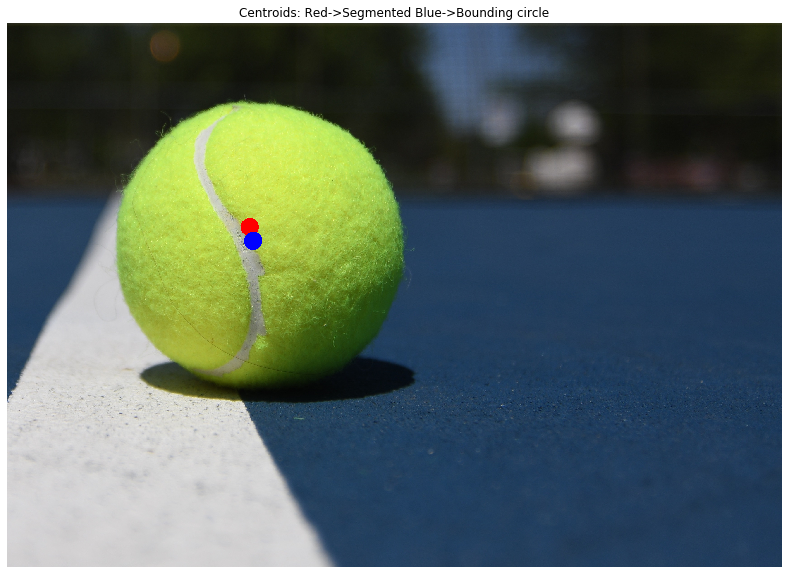

In [17]:
# Tambien es posible obtener una segmentacion con el bounding box
image = cv2.imread('imgs/tennis.jpg') 

# Pasamos la imagen a espacio HSV
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Segmentacion
min_val = (35,100,100)
max_val = (40,255,255) 
segmented = cv2.inRange(image, min_val, max_val)

# Filtrado
filtered = cv2.medianBlur(segmented,3)
kernel = disk(7) #7
filtered = closing(filtered, kernel)
kernel = disk(3) #1
filtered = opening(filtered, kernel)

# Para calcular el bounding box es primero necesario hallar los contornos
contours, _ = cv2.findContours(filtered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_sel = []

# Se filtran los contornos para solo tener contornos mas grandes a cierta area
thresh_area = 10000.0

for ii in range(len(contours)):
    area = cv2.contourArea(contours[ii])
    if(area>thresh_area):
        contours_sel.append(contours[ii])

# Se calcula el centroide para la mascara usando el filtro
image = cv2.imread('imgs/tennis.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

new_mask = np.zeros((filtered.shape), dtype=np.uint8)
for ii in range(len(contours_sel)):
    cnt = contours_sel[ii]

    # Moments
    M = cv2.moments(cnt)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(image, (cX, cY), 40, (255, 0, 0), -1) # Se dibuja el centroide

    # Circle for new mask
    (x,y),radius = cv2.minEnclosingCircle(cnt) 
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(new_mask,center,radius,255,-1)

# Se calculan los contornes de la nueva mascara
contours, _ = cv2.findContours(new_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for ii in range(len(contours)):
    cnt = contours[ii]

    # Moments
    M = cv2.moments(cnt)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(image, (cX, cY), 40, (0, 0, 255), -1) # Se dibuja el centroide


plt.figure(figsize=(20,10))
plt.imshow(image)           
plt.title('Centroids: Red->Segmented Blue->Bounding circle')
plt.axis('off')  
plt.show() 